### Random Forest
##### Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
##### Bagging(Yerine konulmalı örneklemler çekilerek, çekilen her örneklem için model kurma işlemi) ve Random Subspace(Rastgele alt uzay; değişkenleri seçmede kullanılır) yöntemlerinin birleşimi ile oluşmuştur.
##### Ağaçlar için; gözlemler bootstrap yöntemi ile, değişkenler random subspace yöntemi ile seçilir.
##### Karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken, tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
##### Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.
##### Her düğüm noktasında rastgele değişken seçimi yapılır.(regresyonda p/3, sınıflamada karekök p)
#### Bagging
##### Temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
###### CART modelinde vermiş olduğumuz veri setinin içerisindeki yapıları öğrenmede çok başarılı fakat daha önce hiç görmediği verileri tahmin etmede başarısız olduğu için "Bagging" yöntemi ortaya atıldı.
###### Random Forest temelini oluşturan yöntem Bagging yöntemidir.

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("diabetes.csv")

In [6]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Model & Prediction

In [7]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.7532467532467533

#### Model Tuning

In [10]:
rf = RandomForestClassifier()

In [11]:
rf_params = {"n_estimators": [100, 200, 500, 1000],
             "max_features": [3, 5, 7, 8],
             "min_samples_split": [2, 5, 10, 20]}

In [12]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [13]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 10, 'n_estimators': 200}

In [14]:
# Final Model
rf_tuned = RandomForestClassifier(max_features=5, min_samples_split=10, n_estimators=200).fit(X_train, y_train)

In [16]:
y_pred = rf_tuned.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.7489177489177489

#### Variables Attention Levels

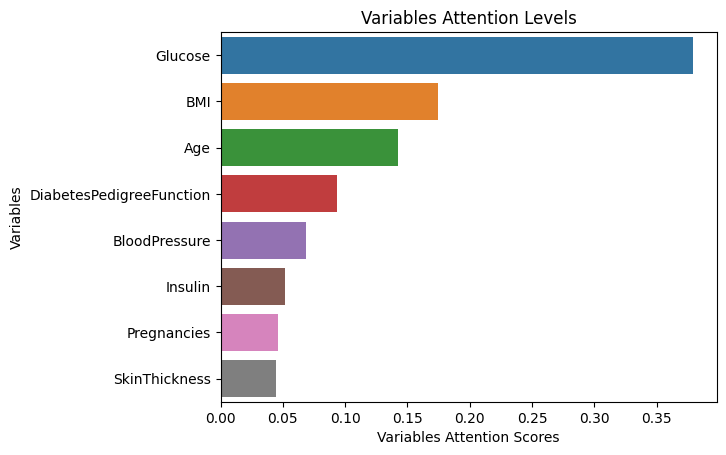

In [20]:
feature_imp = pd.Series(rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Variables Attention Scores")
plt.ylabel("Variables")
plt.title("Variables Attention Levels")
plt.show()